In [3]:
from ising_model import ClassicIsing
import electron
from grid import Grid, HoleGrid, Mobius, Cylinder, Torus
import matplotlib.pyplot as plt
import numpy as np

Normal Grid Temperature vs Average Absolute Magnetization

T=1.00, <|M|>=0.862
T=1.09, <|M|>=0.880
T=1.17, <|M|>=0.832
T=1.26, <|M|>=0.822
T=1.34, <|M|>=0.630
T=1.43, <|M|>=0.442
T=1.52, <|M|>=0.452
T=1.60, <|M|>=0.382
T=1.69, <|M|>=0.310
T=1.78, <|M|>=0.236
T=1.86, <|M|>=0.192
T=1.95, <|M|>=0.176
T=2.03, <|M|>=0.192
T=2.12, <|M|>=0.212
T=2.21, <|M|>=0.218
T=2.29, <|M|>=0.132
T=2.38, <|M|>=0.234
T=2.47, <|M|>=0.168
T=2.55, <|M|>=0.132
T=2.64, <|M|>=0.088
T=2.72, <|M|>=0.112
T=2.81, <|M|>=0.106
T=2.90, <|M|>=0.162
T=2.98, <|M|>=0.086
T=3.07, <|M|>=0.164
T=3.16, <|M|>=0.126
T=3.24, <|M|>=0.146
T=3.33, <|M|>=0.114
T=3.41, <|M|>=0.136
T=3.50, <|M|>=0.212


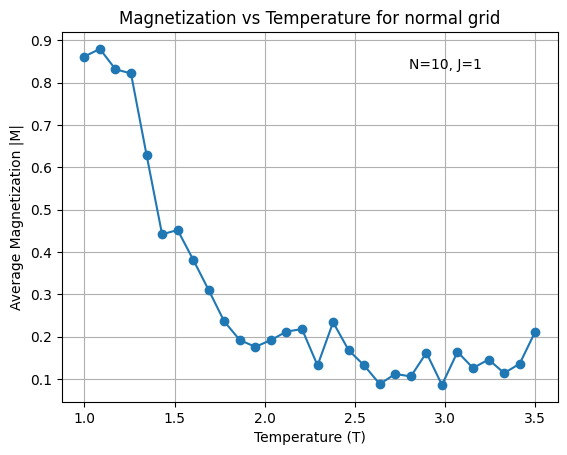

In [4]:
# --- Parameters ---
N = 10            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 10    # Average over multiple runs
newGrid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron)
isingModel = ClassicIsing(newGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        newGrid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron)
        isingModel.grid = newGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

Grid with Hole Temperature vs Average Absolute Magnetization

In [ ]:
# --- Parameters ---
N = 10            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 10    # Average over multiple runs

holeGrid = HoleGrid(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2, hole_grid=np.ones((3,3)) ,c_y=2, c_x=2)

isingModel = ClassicIsing(holeGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        holeGrid = HoleGrid(n_x= N, n_y=N, gridPointObject=electron.ClassicElectron, random_seed=2, hole_grid=np.ones((3,3)) ,c_y=5, c_x=5)

        isingModel.grid = holeGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

T=1.00, <|M|>=0.460
T=1.09, <|M|>=0.436
T=1.17, <|M|>=0.268
T=1.26, <|M|>=0.254
T=1.34, <|M|>=0.232
T=1.43, <|M|>=0.212
T=1.52, <|M|>=0.140
T=1.60, <|M|>=0.224
T=1.69, <|M|>=0.168
T=1.78, <|M|>=0.162
T=1.86, <|M|>=0.200
T=1.95, <|M|>=0.138
T=2.03, <|M|>=0.130
T=2.12, <|M|>=0.154
T=2.21, <|M|>=0.070
T=2.29, <|M|>=0.134
T=2.38, <|M|>=0.128
T=2.47, <|M|>=0.152
T=2.55, <|M|>=0.142
T=2.64, <|M|>=0.084
T=2.72, <|M|>=0.132


KeyboardInterrupt: 

T=1.00, <|M|>=0.969
T=1.09, <|M|>=0.961
T=1.17, <|M|>=0.922
T=1.26, <|M|>=0.865
T=1.34, <|M|>=0.800
T=1.43, <|M|>=0.741
T=1.52, <|M|>=0.596
T=1.60, <|M|>=0.548
T=1.69, <|M|>=0.482
T=1.78, <|M|>=0.355
T=1.86, <|M|>=0.259
T=1.95, <|M|>=0.261
T=2.03, <|M|>=0.230
T=2.12, <|M|>=0.253
T=2.21, <|M|>=0.237
T=2.29, <|M|>=0.181
T=2.38, <|M|>=0.200
T=2.47, <|M|>=0.188
T=2.55, <|M|>=0.168
T=2.64, <|M|>=0.206
T=2.72, <|M|>=0.137
T=2.81, <|M|>=0.152
T=2.90, <|M|>=0.143
T=2.98, <|M|>=0.170
T=3.07, <|M|>=0.123
T=3.16, <|M|>=0.109
T=3.24, <|M|>=0.118
T=3.33, <|M|>=0.121
T=3.41, <|M|>=0.143
T=3.50, <|M|>=0.127


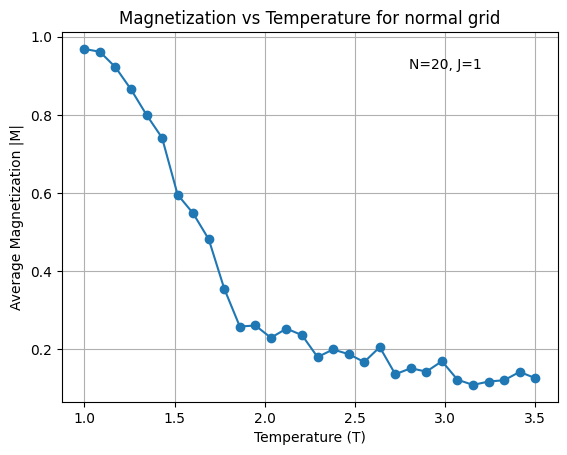

In [9]:
# --- Parameters ---
N = 20            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 30    # Average over multiple runs

mobiusGrid = Mobius(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2)

isingModel = ClassicIsing(mobiusGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        mobiusGrid = Mobius(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2)


        isingModel.grid = mobiusGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()